### Student details

Student name: Lin Yuan Chong

Student ID: 22249516

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [52]:
# import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [53]:
class Perceptron(object):
  def __init__(self, eta=0.01, epochs=50):
      self.eta = eta
      self.epochs = epochs

  def train(self, X, y):

      self.w_ = np.zeros(1 + X.shape[1])
      self.errors_ = []

      for _ in range(self.epochs):
          errors = 0
          for xi, target in zip(X, y):
              update = self.eta * (target - self.predict(xi))
              self.w_[1:] +=  update * xi 
              self.w_[0] +=  update
              errors += int(update != 0.0)
          self.errors_.append(errors)

          print("-------------------------------------")
          print("Epoch: ", _)
          print("Errors: ", errors)
          
      return self

  def net_input(self, X):
      return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
      return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

In [54]:
# Read the data from the .csv, using the first row as the headers of the data
data = pd.read_csv('/content/01_heights_weights_genders.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

In [55]:
len(data)

10000

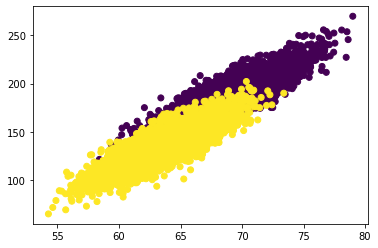

In [56]:
import matplotlib.pyplot as plt

#Plot overall data.
plt.scatter(X[:,0], X[:,1],c=y);

### Train/Test Split 
(provided - should be completed in previous E-tivity)

In [57]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

### Train the algorithm (Task)

In [42]:
################################
# Your code here

#Train algorithm.
ppn = Perceptron(epochs = 50, eta =0.1)
ppn.train(X_train, y_train)
prediction = ppn.predict(X_test)


-------------------------------------
Epoch:  0
Errors:  1228
-------------------------------------
Epoch:  1
Errors:  940
-------------------------------------
Epoch:  2
Errors:  907
-------------------------------------
Epoch:  3
Errors:  897
-------------------------------------
Epoch:  4
Errors:  866
-------------------------------------
Epoch:  5
Errors:  852
-------------------------------------
Epoch:  6
Errors:  833
-------------------------------------
Epoch:  7
Errors:  870
-------------------------------------
Epoch:  8
Errors:  847
-------------------------------------
Epoch:  9
Errors:  842
-------------------------------------
Epoch:  10
Errors:  827
-------------------------------------
Epoch:  11
Errors:  839
-------------------------------------
Epoch:  12
Errors:  849
-------------------------------------
Epoch:  13
Errors:  829
-------------------------------------
Epoch:  14
Errors:  835
-------------------------------------
Epoch:  15
Errors:  831
-----------------

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

CLASSIFICATION REPORT:

Accuracy:  0.8545454545454545
              precision    recall  f1-score   support

          -1       0.73      0.98      0.84      1260
           1       0.98      0.78      0.87      2040

    accuracy                           0.85      3300
   macro avg       0.86      0.88      0.85      3300
weighted avg       0.89      0.85      0.86      3300

Confusion matrix:
[[1229  449]
 [  31 1591]]




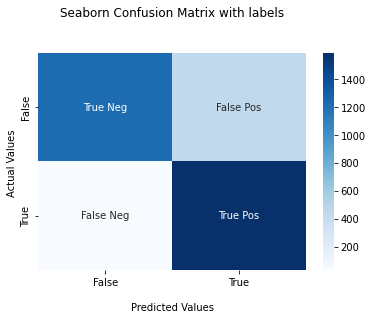

In [43]:
################################
# Your code here

accuracy = accuracy_score(y_test,prediction)
report = classification_report(prediction, y_test)
cm = confusion_matrix(y_test, prediction)

#Output classification report.
print("CLASSIFICATION REPORT:\n")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)
print("\n")

#Plot a confusion matrix.
labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

#Display the visualization of the Confusion Matrix.
plt.show()

### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


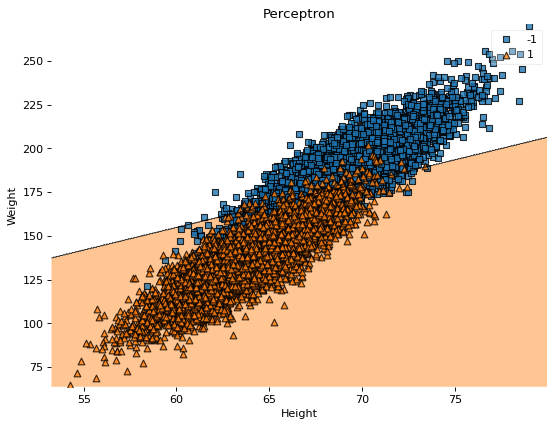

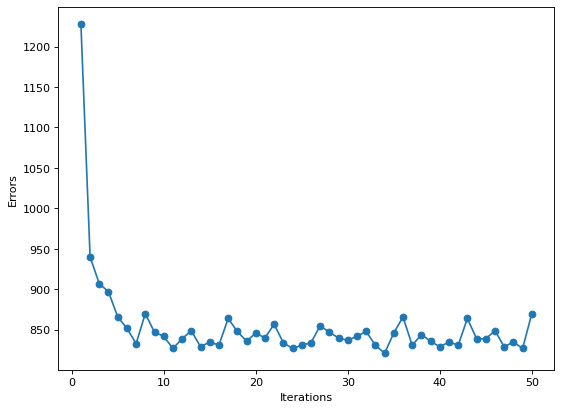

In [44]:
from mlxtend.plotting import plot_decision_regions
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

#Plot decision boundary.
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

print("\n")
figure(figsize=(8, 6), dpi=80)

#Plot errors.
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.show()


In [45]:
#Get data.
heightData = data["Height"]
weightData = data["Weight"]

#Get boundaries of heights.
heightMin = heightData.min()
heightMax = heightData.max()
#Get boundaries of weights.
weightMin = weightData.min()
weightMax = weightData.max()

print("Height range:\t", round(heightMin, 2), "~", round(heightMax, 2), 'inches')
print("Weight range:\t", round(weightMin, 2), "~", round(weightMax, 2), 'lbs')

#Functions to create a sample dataframe.
def CreateDataFrame(num):

  columns = ['Height','Weight']
  df = pd.DataFrame(columns=columns)

  for i in range(num):
    #Within range.
    height = np.random.uniform(heightMin, heightMax)
    weight = np.random.uniform(weightMin, weightMax)
    #Assign.
    df.loc[i]= [height, weight]

  return df


Height range:	 54.26 ~ 79.0 inches
Weight range:	 64.7 ~ 269.99 lbs


In [46]:
#Create sample dataframe.
sampleDf = CreateDataFrame(5000)
sampleDf.head(10)

,Height,Weight
0,71.231895,92.975724
1,67.118705,83.653542
2,73.922188,202.368509
3,56.801691,254.538279
4,63.554840,118.495561
5,71.374838,69.878608
6,64.942364,151.281994
7,62.320064,76.400901
8,63.405091,196.771198
9,66.618038,161.504207


In [47]:
#Predict.
sampleDf['Pred Gender'] = ppn.predict(sampleDf.iloc[:,:])

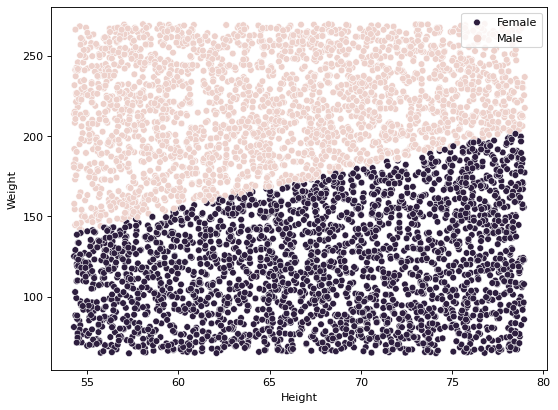

In [48]:
figure(figsize=(8, 6), dpi=80)

#Plot preidction data to check for decision boundary.
sns.scatterplot(data=sampleDf, x="Height", y="Weight", hue="Pred Gender")
plt.legend(labels=["Female", "Male"])
plt.show()

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses? 

As the training progresses, the amount of errors reduces until around 850 during the 6th-7th iteration. Any iterations after that will produce a number of errors that fluctuates around 825 to 875.

2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?

The last epoch did not produce the best solution. In fact, starting from the 8th/9th epoch, number of errors arised again and fluctuates in the coming iterations. Epoch that produces the best result is the 33rd/34th epoch, which resulted in the minimum amount of errors.

3.	Why can’t we get zero error with this data?

It is almost impossible to achieve zero errors because the dataset is extremely enormous(10000). The number of errors can only be reduced to around 850, consider this extremely minimal as it is only 8.5% of the entire dataframe.

In [49]:
#Perceptron class(with early exit).
class PerceptronEE(object):
  def __init__(self, eta=0.01, epochs=50):
      self.eta = eta
      self.epochs = epochs

  def train(self, X, y):

      self.w_ = np.zeros(1 + X.shape[1])
      self.errors_ = []
      
      #Declare an empty list for comparison.
      compareSet = []

      for _ in range(self.epochs):
          errors = 0
          
          for xi, target in zip(X, y):
              update = self.eta * (target - self.predict(xi))
              self.w_[1:] +=  update * xi 
              self.w_[0] +=  update
              errors += int(update != 0.0)
          self.errors_.append(errors)
          
          #If compare list reaches 3 values.
          if len(compareSet) == 3:
            
            #If x[i+1]-x[i] and x[i]-x[i-1] have a difference below 20, break the loop.
            diff = abs(abs(compareSet[2]-compareSet[1])-abs(compareSet[1]-compareSet[0]))
            if diff < 20:
              break
            
            #Else clear the list for next 3 inputs.
            compareSet = []
            compareSet.append(errors)
          else:
            #Append the list with error values as usual.
            compareSet.append(errors)
          
          print("-------------------------------------")
          print("Epoch: ", _)
          print("Errors: ", errors)
          print("Min: ", compareSet)

      return self

  def net_input(self, X):
      return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
      return np.where(self.net_input(X) >= 0.0, 1, -1)

In [50]:
#Train with perceptrons with early exit.
ppn = PerceptronEE(epochs = 50, eta =0.1)
ppn.train(X_train, y_train)
prediction = ppn.predict(X_test)

-------------------------------------
Epoch:  0
Errors:  1228
Min:  [1228]
-------------------------------------
Epoch:  1
Errors:  940
Min:  [1228, 940]
-------------------------------------
Epoch:  2
Errors:  907
Min:  [1228, 940, 907]
-------------------------------------
Epoch:  3
Errors:  897
Min:  [897]
-------------------------------------
Epoch:  4
Errors:  866
Min:  [897, 866]
-------------------------------------
Epoch:  5
Errors:  852
Min:  [897, 866, 852]


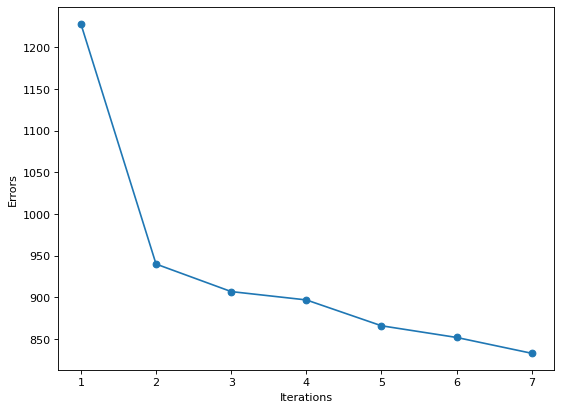

In [51]:
#Plot training with early exit.
figure(figsize=(8, 6), dpi=80)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.show()